Name: Arnav Karwa
PRN: 1032232194

## Tree based classifier and K-fold cross validation

Objectives:
- To Study tree based classifier
- To implement kfold cv on given classifier

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
# Load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

In [64]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [66]:
#Predictions and Evaluation
y_pred = dt_model.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Data: 0.7922077922077922

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [67]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

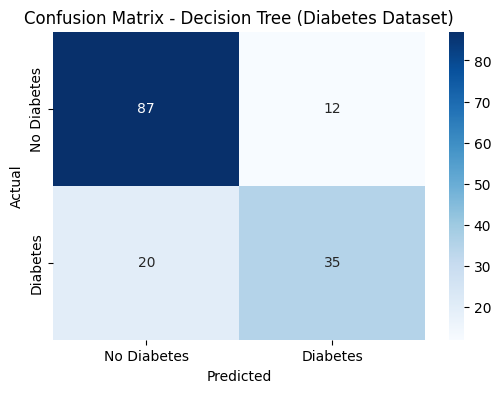

In [68]:
# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Diabetes Dataset)")
plt.show()

In [69]:
# Kfold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_model, X, y, cv=kf)
print("\nScores for each fold:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())


Scores for each fold: [0.79220779 0.75974026 0.75974026 0.79738562 0.75163399]
Mean Accuracy (Cross-Validation): 0.7721415839062897


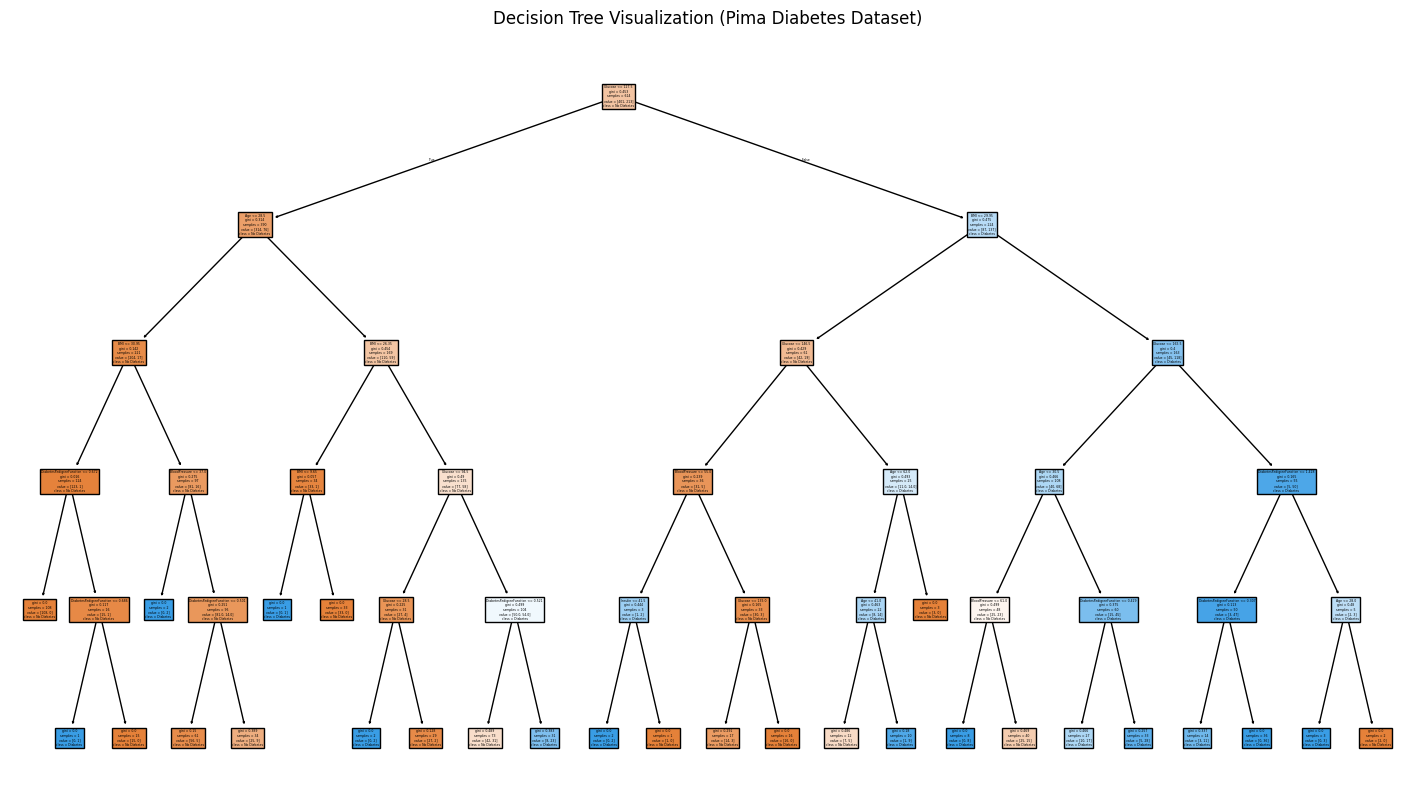

In [70]:
#Decision tree visualization
plt.figure(figsize=(18,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes','Diabetes'], filled=True)
plt.title("Decision Tree Visualization (Pima Diabetes Dataset)")
plt.show()